In [78]:
import numpy as np
import sympy as sp
import pandas as pd
import math
from scipy.interpolate import griddata
import matplotlib.pyplot as plt


from sympy import solve, Eq, symbols, re

lam1,lam2 ,p, coeffIAT2 = symbols('lam1 lam2 p coeffIAT2')

coeffIAT2 = 16
coeffST2_arr = [ 1.21, 4, 25, 64]

In [79]:
def compute_kurtosis_H2(lam1 , lam2, p) :
    
    moment1 = (p/lam1+ (1-p)/lam2)
    moment2 = (2*p/lam1**2 + 2*(1-p)/lam2**2)
    moment3 = (6*p/lam1**3 + 6*(1-p)/lam2**3)
    moment4 = (24*p/lam1**4 + 24*(1-p)/lam2**4)
    
    kurtosis_num = moment4 - 4*moment1*moment3 + 6*(moment1**2)*moment2 - 3*(moment1**4) 
    kurtosis_deno = (moment2 - moment1**2)**2

    return (kurtosis_num / kurtosis_deno) 

In [80]:
compute_kurtosis_H2(13.12377,0.071480, 0.93360)

90.91789706408342

In [81]:
def calculatecoeff_var(lam1, lam2, p) :
    dist_mean =  p/lam1+ (1-p)/lam2
    dist_var = (2*p/lam1**2 + 2*(1-p)/lam2**2) - dist_mean**2
    dist_sd = abs(np.sqrt(dist_var))
    
    if (dist_sd / dist_mean) >= 1 :
        return(dist_sd/dist_mean)
    else :
        print("Please check your inputs. Coefficient of variance < 1")
        return -100

In [82]:
calculatecoeff_var(13.12377,0.071480, 0.93360)


4.999859835679422

In [83]:
#Implementing the Tarasov H2/H2/1 RT
def Tarasov(p_arr, lam1_arr, lam2_arr, q_arr, mu1_arr, mu2_arr) :
    WTarasov_arr = []
    for k in range(min(len(p_arr), len(q_arr))) : 
        a_0 = (lam1_arr[k]*lam2_arr[k])
        a_1 = p_arr[k]*lam1_arr[k] + (1-p_arr[k])*lam2_arr[k]
        b_0 = (mu1_arr[k]*mu2_arr[k])
        b_1 = q_arr[k]*mu1_arr[k] + (1-q_arr[k])*mu2_arr[k]

        c_0 = a_0*b_1 - a_1*b_0 - a_0*(mu1_arr[k]+mu2_arr[k]) + b_0*(lam1_arr[k] + lam2_arr[k])
        c_1 = -a_1*b_1 -a_0 - b_0  + (lam1_arr[k] + lam2_arr[k])*(mu1_arr[k] + mu2_arr[k])
        c_2 = lam1_arr[k] + lam2_arr[k] - mu1_arr[k] - mu2_arr[k]
        
        x = symbols('x')
        expr = x**3-c_2*x**2-c_1*x-c_0


        sol = solve(expr)
        #print(sol)
        
        #calculate wait time in queue Wq
        
        Wq = (-1/re(sol[0])) + (-1/re(sol[1])) - (1/mu1_arr[k]) - (1/mu2_arr[k]) 
        
        #calculate response time in queue W

        W = Wq + (q_arr[k]/mu1_arr[k]+ (1-q_arr[k])/mu2_arr[k])
        WTarasov_arr.append(W)

        if k == 0 :
            print("In order lam1 lam2 p", lam1_arr[k], lam2_arr[k], p_arr[k])
            print("In order mu1 mu2 q", mu1_arr[k], mu2_arr[k], q_arr[k])
            print("RT ", W)

    return WTarasov_arr

# 2D plots fixed IAT (take specific values of p, lam1, lam2), changing ST

Lengths for parameter vectors of IAT :  1000 1000 1000
In order lam1 lam2 p 9.9637 0.06678 0.8946
In order mu1 mu2 q 1.331946718341847 0.7035733948468892 0.6283278255144904
RT  20.5824872913146
Lengths for parameter vectors of IAT :  1000 1000 1000
In order lam1 lam2 p 9.9637 0.06678 0.8946
In order mu1 mu2 q 8.156705284991977 0.36905902813345737 0.6608414648019495
RT  22.7124770041562
Lengths for parameter vectors of IAT :  1000 1000 1000
In order lam1 lam2 p 9.9637 0.06678 0.8946
In order mu1 mu2 q 9.344107703957807 0.06926099614909291 0.9376894055763884
RT  38.5141567232518
Lengths for parameter vectors of IAT :  1000 1000 1000
In order lam1 lam2 p 9.9637 0.06678 0.8946
In order mu1 mu2 q 1.2794966293568397 0.006886928482253047 0.9984874598267729
RT  67.5758139479358
False
False


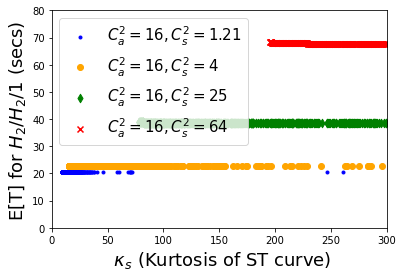

In [74]:
#Fixed IAT, changing ST CV
W_exact = []

final_df = pd.DataFrame(columns = ['q', 'mu1', 'mu2', 'coeffIAT_sq', 'coeffST_sq', 'lam_kurt', 'mu_kurt', 'Response time'])
for coeffST2 in coeffST2_arr :
    
    i = 0
    j = 0
    #For IAT where mean service time is 5
    p_arr= [0.8946]*1000
    lam1_arr = [9.9637]*1000
    lam2_arr = [0.06678]*1000
    lam_kurt_arr = []
    

    q_arr = []
    mu1_arr = []
    mu2_arr = []
    mu_kurt_arr = []
   
    

    while i < 1000 :
        #p = np.random.rand()
        #lam2 = 0.4*(2.0*p + 1.41421*math.sqrt(-p*(coeffIAT2 - 1.0)*(p - 1.0)) - 2.0)/(coeffIAT2*p + p - 2.0)  
        #lam1 = (0.8*p + 0.56568*math.sqrt(p*(-coeffIAT2*p + coeffIAT2 + p - 1.0)))/(coeffIAT2*p - coeffIAT2 + p + 1.0)

       

        q = np.random.rand()
        mu2 = (2*q + math.sqrt(2)*math.sqrt(-q*(coeffST2 - 1)*(q - 1)) - 2)/(coeffST2*q + q - 2)  # Multiplying by 10 to scale the random numbers between 0 and 20
        mu1 = (2*q + math.sqrt(2)*math.sqrt(q*(-coeffST2*q + coeffST2 + q - 1)))/(coeffST2*q - coeffST2 + q + 1)

        if mu1 <= 0 or mu2 <= 0:
            continue
        
        if calculatecoeff_var(mu1, mu2, q) >= 1 :
            
            lam_kurt_arr.append(compute_kurtosis_H2(lam1_arr[0], lam2_arr[0], p_arr[0]))

            q_arr.append(q)
            mu1_arr.append(mu1)
            mu2_arr.append(mu2)
            #if calculatecoeff_var(mu1, mu2, q) > 0  :
            mu_kurt_arr.append(compute_kurtosis_H2(mu1, mu2, q))
        

        i += 1

    
    print("Lengths for parameter vectors of IAT : ", len(p_arr), len(lam1_arr), len(lam2_arr))
    #print(mu_coeff_var_arr)
    W_exact = Tarasov(p_arr, lam1_arr, lam2_arr, q_arr, mu1_arr, mu2_arr)
    
    store_df = pd.DataFrame({'q' : q_arr,
                             'mu1' : mu1_arr, 
                             'mu2' : mu2_arr,
                            'coeffIAT_sq' : [16] * len(W_exact),
                            'coeffST_sq' : [coeffST2] * len(W_exact),
                            'lam_kurt' : lam_kurt_arr,
                            'mu_kurt' : mu_kurt_arr,
                            'Response time' : W_exact}
                            )
    final_df = final_df.append(store_df, ignore_index = True)
    #fig = plt.figure(figsize=(8, 8))
    #ax1 = fig.add_subplot( projection='3d')
    
    #plt.scatter(lam_kurt_arr, W_exact)
    
    if coeffST2 == 1.21 :
        plt.scatter(mu_kurt_arr, W_exact, color = 'blue', label = r'$C_a^2 = 16, C_s^2 = 1.21$', marker = '.')
        #ax1.scatter3D(lam_kurt_arr, mu_kurt_arr, W_exact, color = 'red', label = 'Ca = 4, Cs = 1.21,')
        #ax1.set_xlim(10, 200)
        #ax1.set_ylim(10,100)
        #ax1.set_zlim(0,400)
        
    elif coeffST2 == 4 :
        plt.scatter(mu_kurt_arr, W_exact, color = 'orange', label = r'$C_a^2 = 16, C_s^2 = 4$', marker = 'o')
        #ax1.scatter3D(lam_kurt_arr, mu_kurt_arr, W_exact, color = 'blue', label = 'Ca = 4, Cs = 2')
        #ax1.set_xlim(10, 200)
        #ax1.set_ylim(10,100)
        #ax1.set_zlim(0,400)
        
    elif coeffST2 == 25 :
        plt.scatter(mu_kurt_arr, W_exact,  color = 'green', label = r'$C_a^2 = 16, C_s^2 = 25$', marker = 'd')
        #ax1.scatter3D(lam_kurt_arr, mu_kurt_arr, W_exact, color = 'green', label = 'Ca = 4, Cs = 5')
        #ax1.set_xlim(10, 200)
        #ax1.set_ylim(70,150)
        #ax1.set_zlim(0,400)
        
    elif coeffST2 == 64 :
        plt.scatter(mu_kurt_arr, W_exact, color = 'red', label = r'$C_a^2 = 16, C_s^2 = 64$', marker = 'x')
        #ax1.scatter3D(lam_kurt_arr, mu_kurt_arr, W_exact, color = 'yellow', label = 'Ca = 4, Cs = 8')
        #ax1.set_xlim(100, 200)
        #ax1.set_ylim(100,200)
        #ax1.set_zlim(200,600)
        
        
    plt.legend(loc = 'upper left', prop = { "size": 15 })

    plt.xlabel(r" $\kappa_s$ (Kurtosis of ST curve)", fontsize = 18)
    plt.ylabel("E[T] for $H_2/H_2/1$ (secs) ", fontsize = 18)
    plt.xlim(0, 300)
    plt.ylim(0, 80)
    final_df = final_df.append(store_df, ignore_index = True)
    
    
    #ax1.set_xlabel('Kurtosis of IAT curve')
    #ax1.set_ylabel('Kurtosis of ST curve')
    #ax1.set_zlabel('RT for H2/H2/1 as per Tarasov for different Ca/Cs')
    #ax1.set_xlim(10, 200)
    #ax1.set_ylim(10,100)
    #ax1.set_zlim(0,400)

    
print(any(num1 < 0 for num1 in W_exact))
print(any(num2 < 0 for num2 in W_exact))

plt.savefig("DetailsH2_H2_1_fixedmean_CVa2D_load0.6.pdf", dpi = 200,  bbox_inches = "tight")
plt.show()




final_df.to_csv('DetailsH2_H2_1_fixedmean_CVa2D_load0.6.csv', index= False)

# 2D plots fixed ST (take specific values of q, mu1, mu2), changing IAT

In [86]:
coeffST2 = 16
coeffIAT2_arr = [ 1.21, 4, 25, 64]

Lengths for parameter vectors of IAT :  1000 1000 1000
In order lam1 lam2 p 0.752534611345641 0.39522767043103 0.7184386646321629
In order mu1 mu2 q 3.5162 0.02221 0.984
RT  49.9877121065312
Lengths for parameter vectors of IAT :  1000 1000 1000
In order lam1 lam2 p 0.930290215035657 0.11483075767009303 0.9224262926488209
In order mu1 mu2 q 3.5162 0.02221 0.984
RT  52.8786545835851
Lengths for parameter vectors of IAT :  1000 1000 1000
In order lam1 lam2 p 4.448002648356931 0.04033435301845283 0.9412901934868751
In order mu1 mu2 q 3.5162 0.02221 0.984
RT  77.0231507347077
Lengths for parameter vectors of IAT :  1000 1000 1000
In order lam1 lam2 p 1.288541661037081 0.010006836394139513 0.991013583264351
In order mu1 mu2 q 3.5162 0.02221 0.984
RT  104.817611509403
False
False


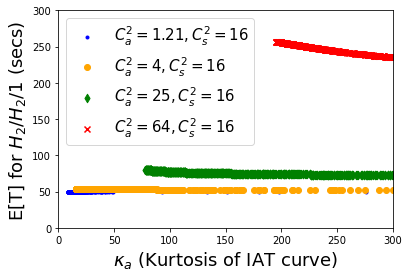

In [87]:
#Fixed IAT, changing ST CV
W_exact = []

final_df = pd.DataFrame(columns = ['p', 'lam1', 'lam2', 'coeffIAT_sq', 'coeffST_sq', 'lam_kurt', 'mu_kurt', 'Response time'])
for coeffIAT2 in coeffIAT2_arr :
    
    i = 0
    j = 0
    #For IAT where mean service time is 5
    q_arr= [0.984]*1000
    mu1_arr = [3.5162]*1000
    mu2_arr = [0.02221]*1000
    mu_kurt_arr = []
    

    p_arr = []
    lam1_arr = []
    lam2_arr = []
    lam_kurt_arr = []
   
    

    while i < 1000 :
        p = np.random.rand()
        lam2 = 0.5998*(2.0*p + 1.41421*math.sqrt(-p*(coeffIAT2 - 1.0)*(p - 1.0)) - 2.0)/(coeffIAT2*p + p - 2.0)  
        lam1 = (1.19976*p + 0.84835*math.sqrt(p*(-coeffIAT2*p + coeffIAT2 + p - 1.0)))/(coeffIAT2*p - coeffIAT2 + p + 1.0)

       

        #q = np.random.rand()
        #mu2 = (2*q + math.sqrt(2)*math.sqrt(-q*(coeffST2 - 1)*(q - 1)) - 2)/(coeffST2*q + q - 2)  # Multiplying by 10 to scale the random numbers between 0 and 20
        #mu1 = (2*q + math.sqrt(2)*math.sqrt(q*(-coeffST2*q + coeffST2 + q - 1)))/(coeffST2*q - coeffST2 + q + 1)

        if lam1 <= 0 or lam2 <= 0:
            continue
        
        if calculatecoeff_var(lam1, lam2, p) >= 1 :
            
            p_arr.append(p)
            lam1_arr.append(lam1)
            lam2_arr.append(lam2)
            lam_kurt_arr.append(compute_kurtosis_H2(lam1, lam2, p))

            
            #if calculatecoeff_var(mu1, mu2, q) > 0  :
            mu_kurt_arr.append(compute_kurtosis_H2(mu1_arr[0], mu2_arr[0], q_arr[0]))
        

        i += 1

    
    print("Lengths for parameter vectors of IAT : ", len(p_arr), len(lam1_arr), len(lam2_arr))
    #print(mu_coeff_var_arr)
    W_exact = Tarasov(p_arr, lam1_arr, lam2_arr, q_arr, mu1_arr, mu2_arr)
    
    store_df = pd.DataFrame({'p' : p_arr,
                             'lam1' : lam1_arr, 
                             'lam2' : lam2_arr,
                            'coeffIAT_sq' : [coeffIAT2] * len(W_exact),
                            'coeffST_sq' : [16] * len(W_exact),
                            'lam_kurt' : lam_kurt_arr,
                            'mu_kurt' : mu_kurt_arr,
                            'Response time' : W_exact}
                            )
    final_df = final_df.append(store_df, ignore_index = True)
    #fig = plt.figure(figsize=(8, 8))
    #ax1 = fig.add_subplot( projection='3d')
    
    #plt.scatter(lam_kurt_arr, W_exact)
    
    if coeffIAT2 == 1.21 :
        plt.scatter(lam_kurt_arr, W_exact, color = 'blue', label = r'$C_a^2 = 1.21, C_s^2 = 16$', marker = '.')
        #ax1.scatter3D(lam_kurt_arr, mu_kurt_arr, W_exact, color = 'red', label = 'Ca = 4, Cs = 1.21,')
        #ax1.set_xlim(10, 200)
        #ax1.set_ylim(10,100)
        #ax1.set_zlim(0,400)
        
    elif coeffIAT2 == 4 :
        plt.scatter(lam_kurt_arr, W_exact, color = 'orange', label = r'$C_a^2 = 4, C_s^2 = 16$', marker = 'o')
        #ax1.scatter3D(lam_kurt_arr, mu_kurt_arr, W_exact, color = 'blue', label = 'Ca = 4, Cs = 2')
        #ax1.set_xlim(10, 200)
        #ax1.set_ylim(10,100)
        #ax1.set_zlim(0,400)
        
    elif coeffIAT2 == 25 :
        plt.scatter(lam_kurt_arr, W_exact,  color = 'green', label = r'$C_a^2 = 25, C_s^2 = 16$', marker = 'd')
        #ax1.scatter3D(lam_kurt_arr, mu_kurt_arr, W_exact, color = 'green', label = 'Ca = 4, Cs = 5')
        #ax1.set_xlim(10, 200)
        #ax1.set_ylim(70,150)
        #ax1.set_zlim(0,400)
        
    elif coeffIAT2 == 64 :
        W_exact = np.array(W_exact)*2
        plt.scatter(lam_kurt_arr, W_exact, color = 'red', label = r'$C_a^2 = 64, C_s^2 = 16$', marker = 'x')
        #ax1.scatter3D(lam_kurt_arr, mu_kurt_arr, W_exact, color = 'yellow', label = 'Ca = 4, Cs = 8')
        #ax1.set_xlim(100, 200)
        #ax1.set_ylim(100,200)
        #ax1.set_zlim(200,600)
        
        
    plt.legend(loc = 'upper left', prop = { "size": 15 })

    plt.xlabel(r"$\kappa_a$ (Kurtosis of IAT curve)", fontsize = 18)
    plt.ylabel("E[T] for $H_2/H_2/1$ (secs) ", fontsize = 18)
    plt.xlim(0, 300)
    plt.ylim(0, 300)
    final_df = final_df.append(store_df, ignore_index = True)
    
    
    #ax1.set_xlabel('Kurtosis of IAT curve')
    #ax1.set_ylabel('Kurtosis of ST curve')
    #ax1.set_zlabel('RT for H2/H2/1 as per Tarasov for different Ca/Cs')
    #ax1.set_xlim(10, 200)
    #ax1.set_ylim(10,100)
    #ax1.set_zlim(0,400)

    
print(any(num1 < 0 for num1 in W_exact))
print(any(num2 < 0 for num2 in W_exact))

plt.savefig("DetailsH2_H2_1_fixedmean_CVs2D_load0.6.pdf", dpi = 200,  bbox_inches = "tight")
plt.show()




final_df.to_csv('DetailsH2_H2_1_fixedmean_CVs2D_load0.6.csv', index= False)

# Generating 3D data

In [16]:
coeffIAT2 = 16
coeffST2_arr = [ 1.21, 4, 25, 64]

Lengths for parameter vectors of IAT :  3000 3000 3000
In order lam1 lam2 p 9.963707657356196 0.06678915433470352 0.8946451165814615
In order mu1 mu2 q 1.3099817686229855 0.6926504804649746 0.6521980578487427
RT  20.6069208264192
Lengths for parameter vectors of IAT :  3000 3000 3000
In order lam1 lam2 p 0.8540044589266039 0.022889416608530815 0.9883314024324769
In order mu1 mu2 q 168.60273673069273 0.3985731504453208 0.6028519783332248
RT  9.78815168209262
Lengths for parameter vectors of IAT :  3000 3000 3000
In order lam1 lam2 p 1.5585891527645563 0.045463916857962215 0.9519740091613289
In order mu1 mu2 q 13.123773623129175 0.07148069702393636 0.933604325764984
RT  36.1594829794548
Lengths for parameter vectors of IAT :  3000 3000 3000
In order lam1 lam2 p 1.1976560718806748 0.03742577018623951 0.967851324703509
In order mu1 mu2 q 2.067121484307426 0.016124178492404134 0.9916106875239338
RT  62.9431693088077
False
False


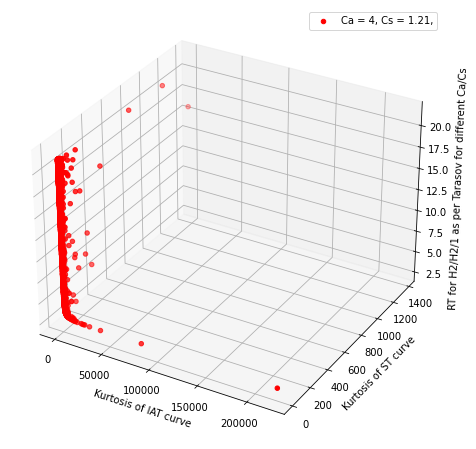

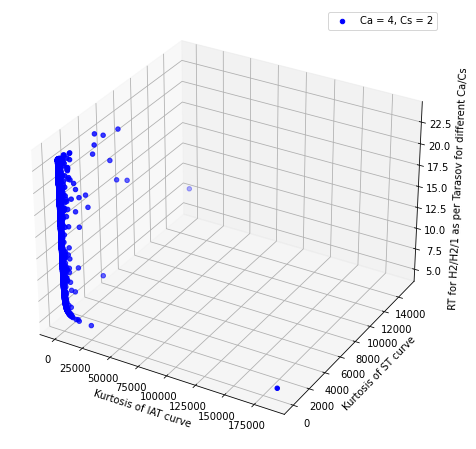

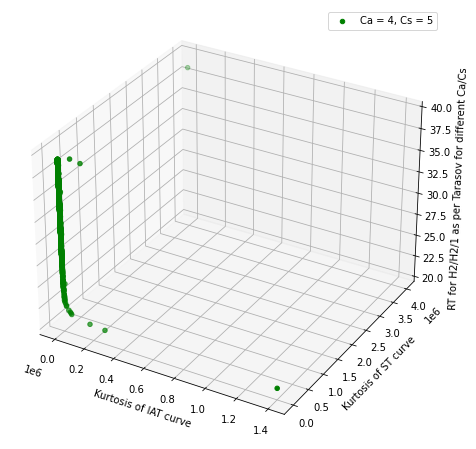

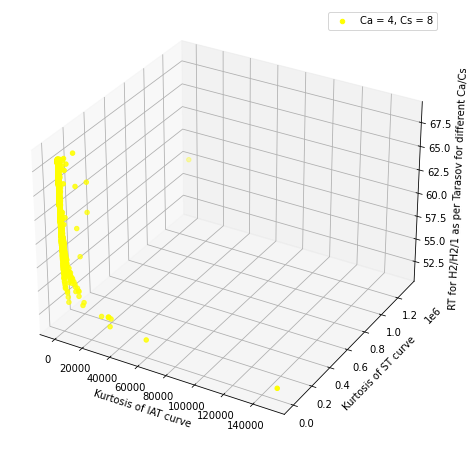

In [17]:
W_exact = []

final_df = pd.DataFrame(columns = ['coeffIAT_sq', 'coeffST_sq', 'lam_kurt', 'mu_kurt', 'Response time'])
for coeffST2 in coeffST2_arr :
    
    i = 0
    j = 0
    #For IAT where mean service time is 5
    p_arr= []
    lam1_arr = []
    lam2_arr = []
    lam_kurt_arr = []
    

    q_arr = []
    mu1_arr = []
    mu2_arr = []
    mu_kurt_arr = []
   
    

    while i < 3000 :
        p = np.random.rand()
        lam2 = 0.5998*(2.0*p + 1.41421*math.sqrt(-p*(coeffIAT2 - 1.0)*(p - 1.0)) - 2.0)/(coeffIAT2*p + p - 2.0)  
        lam1 = (1.19976*p + 0.84835*math.sqrt(p*(-coeffIAT2*p + coeffIAT2 + p - 1.0)))/(coeffIAT2*p - coeffIAT2 + p + 1.0)

        if lam1 <= 0 or lam2 <= 0 :
            continue
        #print("lam1 :",lam1, "lam2 :", lam2, "p :",p)

        q = np.random.rand()*0.5 + 0.5
        mu2 = (2*q + math.sqrt(2)*math.sqrt(-q*(coeffST2 - 1)*(q - 1)) - 2)/(coeffST2*q + q - 2)  # Multiplying by 10 to scale the random numbers between 0 and 20
        mu1 = (2*q + math.sqrt(2)*math.sqrt(q*(-coeffST2*q + coeffST2 + q - 1)))/(coeffST2*q - coeffST2 + q + 1)

        if mu1 <= 0 or mu2 <= 0:
            continue
        
        if calculatecoeff_var(lam1, lam2, p) >=1 and calculatecoeff_var(mu1, mu2, q) >= 1 :
            p_arr.append(p)
            lam1_arr.append(lam1)
            lam2_arr.append(lam2)
            #if calculatecoeff_var(lam1, lam2, p) > 0  :
            lam_kurt_arr.append(compute_kurtosis_H2(lam1, lam2, p))

            q_arr.append(q)
            mu1_arr.append(mu1)
            mu2_arr.append(mu2)
            #if calculatecoeff_var(mu1, mu2, q) > 0  :
            mu_kurt_arr.append(compute_kurtosis_H2(mu1, mu2, q))
        

        i += 1

    
    print("Lengths for parameter vectors of IAT : ", len(p_arr), len(lam1_arr), len(lam2_arr))
    #print(mu_coeff_var_arr)
    W_exact = Tarasov(p_arr, lam1_arr, lam2_arr, q_arr, mu1_arr, mu2_arr)
    
    store_df = pd.DataFrame({'coeffIAT_sq' : [16] * len(W_exact),
                            'coeffST_sq' : [coeffST2] * len(W_exact),
                            'lam_kurt' : lam_kurt_arr,
                            'mu_kurt' : mu_kurt_arr,
                            'Response time' : W_exact}
                            )
    final_df = final_df.append(store_df, ignore_index = True)
    fig = plt.figure(figsize=(8, 8))
    ax1 = fig.add_subplot( projection='3d')
    
    #plt.scatter(lam_kurt_arr, W_exact)
    
    if coeffST2 == 1.21 :
        #plt.scatter(mu_kurt_arr, W_exact, color = 'red', label = 'Ca = 4, Cs = 1.21,')
        ax1.scatter3D(lam_kurt_arr, mu_kurt_arr, W_exact, color = 'red', label = 'Ca = 4, Cs = 1.21,')
        #ax1.set_xlim(10, 200)
        #ax1.set_ylim(10,100)
        #ax1.set_zlim(0,400)
        
    elif coeffST2 == 4 :
        #plt.scatter(mu_kurt_arr, W_exact, color = 'blue', label = 'Ca = 4, Cs = 2')
        ax1.scatter3D(lam_kurt_arr, mu_kurt_arr, W_exact, color = 'blue', label = 'Ca = 4, Cs = 2')
        #ax1.set_xlim(10, 200)
        #ax1.set_ylim(10,100)
        #ax1.set_zlim(0,400)
        
    elif coeffST2 == 25 :
        #plt.scatter(mu_kurt_arr, W_exact,  color = 'green', label = 'Ca = 4, Cs = 5')
        ax1.scatter3D(lam_kurt_arr, mu_kurt_arr, W_exact, color = 'green', label = 'Ca = 4, Cs = 5')
        #ax1.set_xlim(10, 200)
        #ax1.set_ylim(70,150)
        #ax1.set_zlim(0,400)
        
    elif coeffST2 == 64 :
        #plt.scatter(mu_kurt_arr, W_exact, color = 'yellow', label = 'Ca = 4, Cs = 8')
        ax1.scatter3D(lam_kurt_arr, mu_kurt_arr, W_exact, color = 'yellow', label = 'Ca = 4, Cs = 8')
        #ax1.set_xlim(100, 200)
        #ax1.set_ylim(100,200)
        #ax1.set_zlim(200,600)
        
        
    plt.legend()

    #plt.xlabel("Kurtosis of ST curve")
    #plt.ylabel("RT for H2/H2/1 as per Tarasov for Ca/Cs ")
    #plt.xlim(10, 250)
    #plt.ylim(0, 200)
    
    
    ax1.set_xlabel('Kurtosis of IAT curve')
    ax1.set_ylabel('Kurtosis of ST curve')
    ax1.set_zlabel('RT for H2/H2/1 as per Tarasov for different Ca/Cs')
    #ax1.set_xlim(10, 200)
    #ax1.set_ylim(10,100)
    #ax1.set_zlim(0,400)

    
print(any(num1 < 0 for num1 in W_exact))
print(any(num2 < 0 for num2 in W_exact))

plt.show()



final_df.to_csv('DetailsH2_H2_1_fixedmean_CVa.csv', index= False)

In [14]:
coeffST2 = 16
coeffIAT2_arr = [ 1.21, 4, 25, 64]

Lengths for parameter vectors of IAT :  3000 3000 3000
In order lam1 lam2 p 0.7675048272073396 0.40506291448423487 0.6876219915322109
In order mu1 mu2 q 3.5162625147631625 0.022213057287545614 0.9840031218586929
RT  49.9464381240670
Lengths for parameter vectors of IAT :  3000 3000 3000
In order lam1 lam2 p 0.6934459591692751 0.04950107572885154 0.9880081454942834
In order mu1 mu2 q 6.578448572340347 0.026214565879373063 0.9776814125594246
RT  52.6670519228527
Lengths for parameter vectors of IAT :  3000 3000 3000
In order lam1 lam2 p 1.1763637787203238 0.023533569933939267 0.9803796437330933
In order mu1 mu2 q 1.2100876674507748 0.005481332030856615 0.9990440360248608
RT  64.0641405682712
Lengths for parameter vectors of IAT :  3000 3000 3000
In order lam1 lam2 p 1.015875088348627 0.0076972414277387356 0.9947047915910248
In order mu1 mu2 q 2.4149197529731827 0.018260588831836583 0.9892194650680153
RT  93.8374198824278
False
False


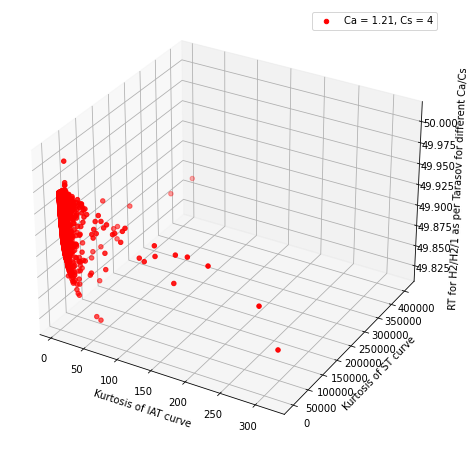

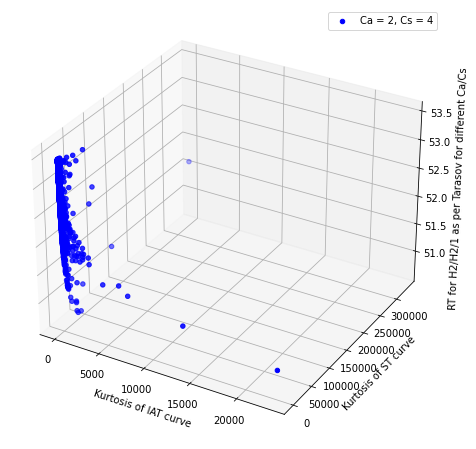

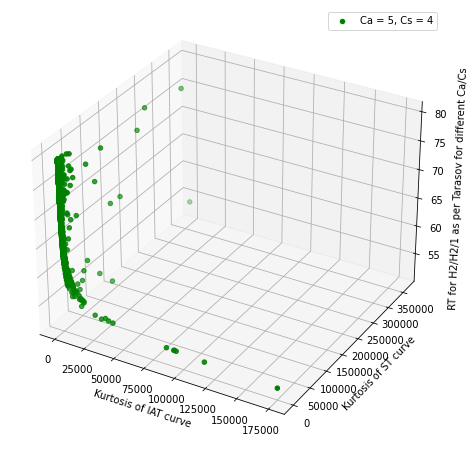

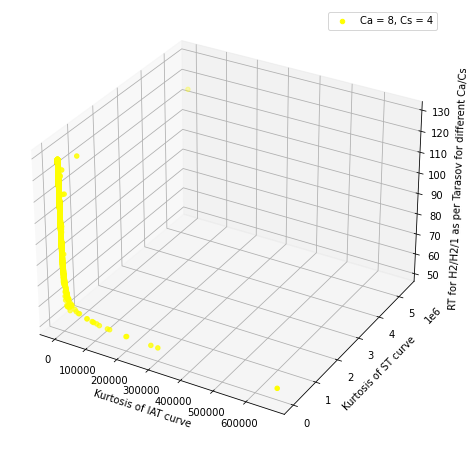

In [15]:
W_exact = []

final_df = pd.DataFrame(columns = ['coeffIAT_sq', 'coeffST_sq', 'lam_kurt', 'mu_kurt', 'Response time'])

for coeffIAT2 in coeffIAT2_arr :
    
    i = 0
    j = 0
    #For IAT where mean service time is 5
    p_arr= []
    lam1_arr = []
    lam2_arr = []
    lam_kurt_arr = []
    

    q_arr = []
    mu1_arr = []
    mu2_arr = []
    mu_kurt_arr = []
   
    

    while i < 3000 :
        p = np.random.rand()
        lam2 = 0.5998*(2.0*p + 1.41421*math.sqrt(-p*(coeffIAT2 - 1.0)*(p - 1.0)) - 2.0)/(coeffIAT2*p + p - 2.0)  
        lam1 = (1.19976*p + 0.84835*math.sqrt(p*(-coeffIAT2*p + coeffIAT2 + p - 1.0)))/(coeffIAT2*p - coeffIAT2 + p + 1.0)
        if lam1 <= 0 or lam2 <= 0 :
            continue
        #print("lam1 :",lam1, "lam2 :", lam2, "p :",p)

        q = np.random.rand()*0.5 + 0.5
        mu2 = (2*q + math.sqrt(2)*math.sqrt(-q*(coeffST2 - 1)*(q - 1)) - 2)/(coeffST2*q + q - 2)  # Multiplying by 10 to scale the random numbers between 0 and 20
        mu1 = (2*q + math.sqrt(2)*math.sqrt(q*(-coeffST2*q + coeffST2 + q - 1)))/(coeffST2*q - coeffST2 + q + 1)

        if mu1 <= 0 or mu2 <= 0:
            continue
        
        if calculatecoeff_var(lam1, lam2, p) >=1 and calculatecoeff_var(mu1, mu2, q) >= 1 :
            p_arr.append(p)
            lam1_arr.append(lam1)
            lam2_arr.append(lam2)
            #if calculatecoeff_var(lam1, lam2, p) > 0  :
            lam_kurt_arr.append(compute_kurtosis_H2(lam1, lam2, p))

            q_arr.append(q)
            mu1_arr.append(mu1)
            mu2_arr.append(mu2)
            #if calculatecoeff_var(mu1, mu2, q) > 0  :
            mu_kurt_arr.append(compute_kurtosis_H2(mu1, mu2, q))
        

        i += 1

    
    print("Lengths for parameter vectors of IAT : ", len(p_arr), len(lam1_arr), len(lam2_arr))
    #print(mu_coeff_var_arr)
    W_exact = Tarasov(p_arr, lam1_arr, lam2_arr, q_arr, mu1_arr, mu2_arr)
    
    store_df = pd.DataFrame({'coeffIAT_sq' : [coeffIAT2] * len(W_exact),
                            'coeffST_sq' : [16] * len(W_exact),
                            'lam_kurt' : lam_kurt_arr,
                            'mu_kurt' : mu_kurt_arr,
                            'Response time' : W_exact}
                            )
    final_df = final_df.append(store_df, ignore_index = True)
    fig = plt.figure(figsize=(8, 8))
    ax1 = fig.add_subplot( projection='3d')
    
    #plt.scatter(lam_kurt_arr, W_exact)
    
    if coeffIAT2 == 1.21 :
        #plt.scatter(mu_kurt_arr, W_exact, color = 'red', label = 'Ca = 4, Cs = 1.21,')
        ax1.scatter3D(lam_kurt_arr, mu_kurt_arr, W_exact, color = 'red', label = 'Ca = 1.21, Cs = 4')
        #ax1.set_xlim(10, 200)
        #ax1.set_ylim(10,100)
        #ax1.set_zlim(0,400)
    elif coeffIAT2 == 4 :
        #plt.scatter(mu_kurt_arr, W_exact, color = 'blue', label = 'Ca = 4, Cs = 2')
        ax1.scatter3D(lam_kurt_arr, mu_kurt_arr, W_exact, color = 'blue', label = 'Ca = 2, Cs = 4')
        #ax1.set_xlim(10, 200)
        #ax1.set_ylim(10,100)
        #ax1.set_zlim(0,400)
    elif coeffIAT2 == 25 :
        #plt.scatter(mu_kurt_arr, W_exact,  color = 'green', label = 'Ca = 4, Cs = 5')
        ax1.scatter3D(lam_kurt_arr, mu_kurt_arr, W_exact, color = 'green', label = 'Ca = 5, Cs = 4')
        #ax1.set_xlim(10, 200)
        #ax1.set_ylim(10,100)
        #ax1.set_zlim(0,400)
    elif coeffIAT2 == 64 :
        #plt.scatter(mu_kurt_arr, W_exact, color = 'yellow', label = 'Ca = 4, Cs = 8')
        ax1.scatter3D(lam_kurt_arr, mu_kurt_arr, W_exact, color = 'yellow', label = 'Ca = 8, Cs = 4')
        #ax1.set_xlim(150, 300)
        #ax1.set_ylim(0,100)
        #ax1.set_zlim(0,400)
        
    plt.legend()

    #plt.xlabel("Kurtosis of ST curve")
    #plt.ylabel("RT for H2/H2/1 as per Tarasov for Ca/Cs ")
    #plt.xlim(10, 250)
    #plt.ylim(0, 200)
    
    
    ax1.set_xlabel('Kurtosis of IAT curve')
    ax1.set_ylabel('Kurtosis of ST curve')
    ax1.set_zlabel('RT for H2/H2/1 as per Tarasov for different Ca/Cs')
    #ax1.set_xlim(10, 200)
    #ax1.set_ylim(10,100)
    #ax1.set_zlim(0,400)

    
print(any(num1 < 0 for num1 in W_exact))
print(any(num2 < 0 for num2 in W_exact))

plt.show()


final_df.to_csv('DetailsH2_H2_1_fixedmean_CVs.csv', index= False)

# Looking at the dataframe for #customers dist

In [59]:
import pandas as pd

df = pd.read_csv("DetailsH2_H2_1_fixedmean_CVa(constantIATparams).csv")

df_25 = df[(df['coeffST_sq'] == 4) & (df['mu_kurt'] < 30 )]
df_25.sort_values(by = 'mu_kurt')

df_25.head(50)

,q,mu1,mu2,coeffIAT_sq,coeffST_sq,lam_kurt,mu_kurt,Response time
2000,0.607833,61.575614,0.396077,16,4.0,54.451166,13.122806,22.774100
2002,0.609298,51.918976,0.395342,16,4.0,54.451166,13.193815,22.771221
2006,0.775122,2.938419,0.305453,16,4.0,54.451166,25.570280,22.683750
2007,0.745983,3.504850,0.322702,16,4.0,54.451166,22.466316,22.687346
2008,0.771627,2.996623,0.307572,16,4.0,54.451166,25.163444,22.684125
2012,0.747300,3.474609,0.321941,16,4.0,54.451166,22.593740,22.687157
2013,0.801644,2.559012,0.288838,16,4.0,54.451166,29.044712,22.681274
2014,0.650455,9.786439,0.374431,16,4.0,54.451166,15.373666,22.719361
2015,0.717725,4.311718,0.338646,16,4.0,54.451166,19.969103,22.692277
2016,0.771895,2.992090,0.307411,16,4.0,54.451166,25.194205,22.684096
